<a href="https://colab.research.google.com/github/sandaruwanWGMA/Machine-Learning-Projects/blob/main/Brain%20Tumor%20Classification/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1hMjVF4MJmumZ3FYwMcz3UMSq4rfz-iTG'})
downloaded.GetContentFile('data.zip')

In [5]:
!unzip data.zip

Archive:  data.zip
  inflating: brain_tumor_dataset/category3_tumor/pt_img (285).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (274).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (291).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (290).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (3).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (294).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (283).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (301).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (276).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (30).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (284).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (275).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (295).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (272).jpg  
  inflating: brain_tumor_dataset

In [6]:
!ls

brain_tumor_dataset  data.zip  sample_data


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = "brain_tumor_dataset"

# Create empty lists to store images and labels
X = []
y = []

categories = os.listdir(data_dir)
for category_id, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    for image_name in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))

        # Normalize pixel values to [0, 1]
        image = image / 255

        X.append(image)
        y.append(category_id)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
######### Data augmentation

train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

In [12]:
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
65/65 [==============================] - 24s 314ms/step - loss: 1.2690 - accuracy: 0.5046 - val_loss: 1.6878 - val_accuracy: 0.3062
Epoch 2/15
65/65 [==============================] - 19s 290ms/step - loss: 0.7305 - accuracy: 0.7014 - val_loss: 1.6943 - val_accuracy: 0.1802
Epoch 3/15
65/65 [==============================] - 23s 353ms/step - loss: 0.5422 - accuracy: 0.7964 - val_loss: 3.0499 - val_accuracy: 0.2636
Epoch 4/15
65/65 [==============================] - 21s 324ms/step - loss: 0.4369 - accuracy: 0.8410 - val_loss: 3.1598 - val_accuracy: 0.2636
Epoch 5/15
65/65 [==============================] - 23s 350ms/step - loss: 0.3413 - accuracy: 0.8885 - val_loss: 3.1301 - val_accuracy: 0.2636
Epoch 6/15
65/65 [==============================] - 23s 354ms/step - loss: 0.2599 - accuracy: 0.9113 - val_loss: 3.5131 - val_accuracy: 0.2636
Epoch 7/15
65/65 [==============================] - 18s 281ms/step - loss: 0.2056 - accuracy: 0.9355 - val_loss: 2.9579 - val_accuracy: 0.3372

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 61ms/step - loss: 0.4102 - accuracy: 0.8837


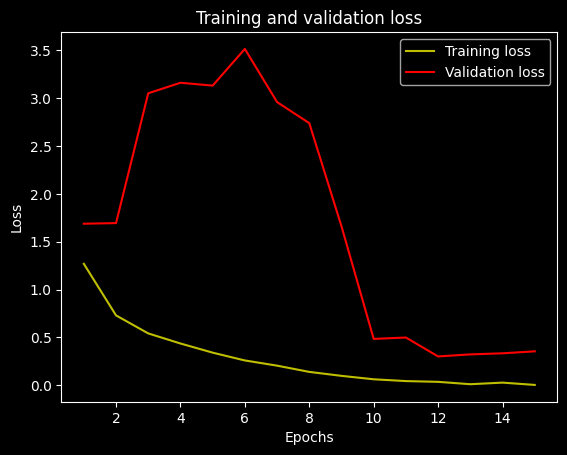

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

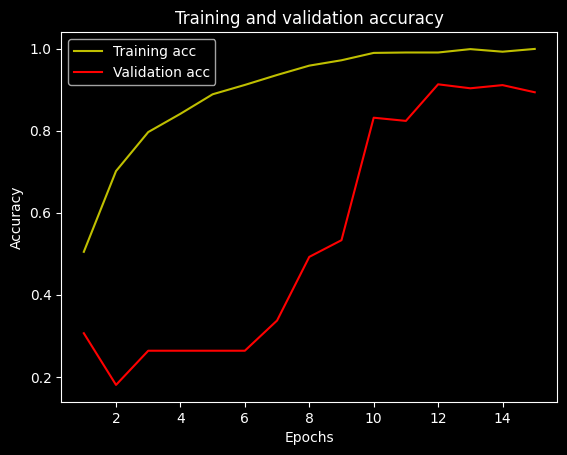

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

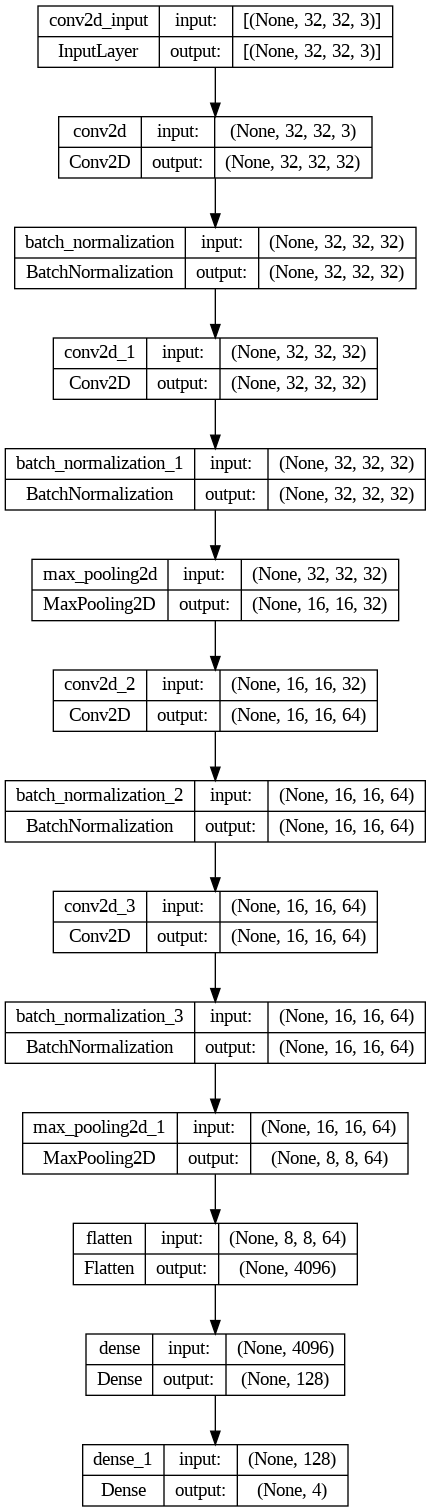

In [20]:
# Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [21]:
# Saving the model as .h5
!pip install h5py

In [22]:
model.save('brain_tumor_classification.h5')